In [ ]:
%matplotlib inline
from IPython.display import display
# tag: remove-cell applied

# Dichotomous Data

## Quickstart

To run a dichotomous dataset:

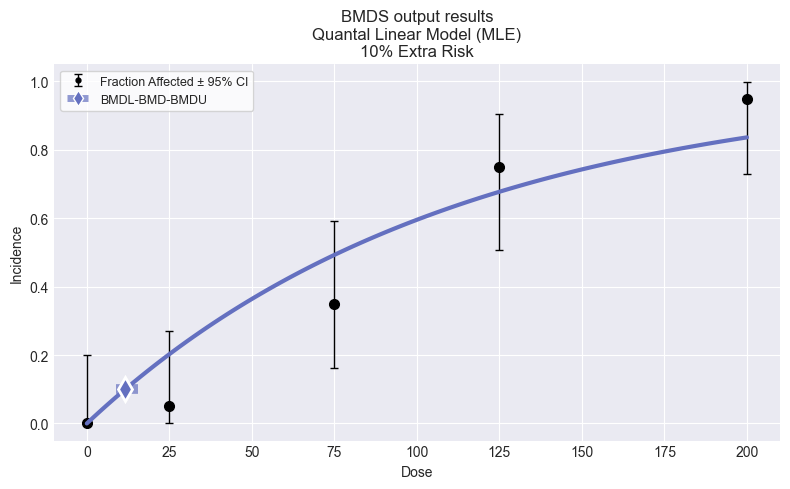

     Quantal Linear Model     
══════════════════════════════

Version: pybmds 25.2a2 (bmdscore 25.1)

Input Summary:
╒══════════════════════════════╤══════════════════════════╕
│ BMR                          │ 10% Extra Risk           │
│ Confidence Level (one sided) │ 0.95                     │
│ Modeling approach            │ frequentist_unrestricted │
╘══════════════════════════════╧══════════════════════════╛

Parameter Settings:
╒═════════════╤═══════════╤═══════╤═══════╕
│ Parameter   │   Initial │   Min │   Max │
╞═════════════╪═══════════╪═══════╪═══════╡
│ g           │         0 │   -18 │    18 │
│ b           │         0 │     0 │   100 │
╘═════════════╧═══════════╧═══════╧═══════╛

Modeling Summary:
╒════════════════╤════════════╕
│ BMD            │  11.6404   │
│ BMDL           │   8.91584  │
│ BMDU           │  15.4669   │
│ AIC            │  74.7575   │
│ Log-Likelihood │ -36.3787   │
│ P-Value        │   0.142335 │
│ Overall d.f.   │   4        │
│ Chi²           │   6

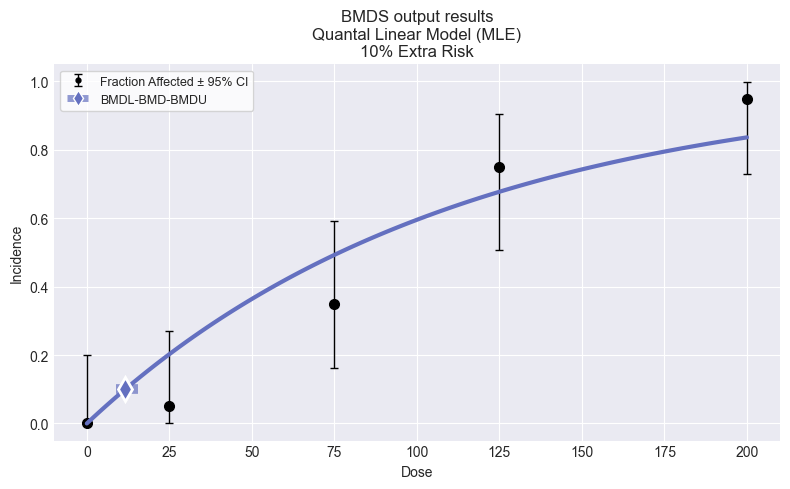

In [1]:
import pybmds

dataset = pybmds.DichotomousDataset(
    doses=[0, 25, 75, 125, 200],
    ns=[20, 20, 20, 20, 20],
    incidences=[0, 1, 7, 15, 19],
)

# create a BMD session
session = pybmds.Session(dataset=dataset)

# add all default models
session.add_default_models()

# execute the session
session.execute()

# recommend a best-fitting model
session.recommend()

if session.recommended_model is not None:
    display(session.recommended_model.plot())
    print(session.recommended_model.text())

# save excel report
df = session.to_df()
df.to_excel("output/report.xlsx")

# save to a word report
report = session.to_docx()
report.save("output/report.docx")

## Dichotomous datasets

Creating a dichotomous dataset requires a list of doses, incidences, and the total number of subjects, one item per dose group. Doses must be unique.

You can also add optional attributes, such as `name`, `dose_name`, `dose_units`, `response_name`, `response_units`, etc.

For example:

In [ ]:
dataset = pybmds.DichotomousDataset(
    name="ChemX Nasal Lesion Incidence",
    dose_name="Concentration",
    dose_units="ppm",
    doses=[0, 25, 75, 125, 200],
    ns=[20, 20, 20, 20, 20],
    incidences=[0, 1, 7, 15, 19],
)

dataset.plot()

## Single model fit

You can fit a specific model to the dataset and plot/print the results.  The printed results will include the BMD, BMDL, BMDU, p-value, AIC, etc. 

The individual models available are shown below. Note that the degrees of the Multistage model can be increased to a maximum of the lesser of N-1 or 8 (as specified in the BMDS User Guide). 

In [ ]:
from pybmds.models import dichotomous

dichotomous.QuantalLinear(dataset)
dichotomous.Multistage(dataset, settings={"degree": 2})
dichotomous.Multistage(dataset, settings={"degree": 3})
dichotomous.Logistic(dataset)
dichotomous.LogLogistic(dataset)
dichotomous.Probit(dataset)
dichotomous.LogProbit(dataset)
dichotomous.Gamma(dataset)
dichotomous.Weibull(dataset)
dichotomous.DichotomousHill(dataset)

As an example, to fit the Logistic model:

In [ ]:
model = dichotomous.Logistic(dataset)
model.execute()
model.plot()

To generate an output report:

In [ ]:
print(model.text())

### Change input settings

The default settings use a BMR of 10% Extra Risk and a 95% confidence interval. If you fit a single model to your dataset, settings for that model can be modified:

In [ ]:
model = dichotomous.Logistic(
    dataset, settings={"bmr": 0.15, "bmr_type": pybmds.DichotomousRiskType.AddedRisk}
)
print(model.settings.tbl())

### Change parameter settings

If you want to see a preview of the initial parameter settings, you can run:

In [ ]:
model = dichotomous.Logistic(dataset)
print(model.priors_tbl())

You can also change the initial parameter settings shown above for any run of a single dichotomous model. 

Continuing with the Logistic model example, for the `a` parameter, you can change the minimum and maximum range from -10 to 10, while `b` can range from 0 to 50:

In [ ]:
model.settings.priors.update("a", min_value=-10, max_value=10)
model.settings.priors.update("b", min_value=0, max_value=50)
print(model.priors_tbl())

You can change the range and initial value for any parameter in the model by following the same steps above.

## Multiple model fit (sessions) and model recommendation

To run all the default models, save the results, and save the plot of the fit of the recommended model with the data:

In [ ]:
dataset = pybmds.DichotomousDataset(
    doses=[0, 25, 75, 125, 200],
    ns=[20, 20, 20, 20, 20],
    incidences=[0, 1, 7, 15, 19],
)

# create a BMD session
session = pybmds.Session(dataset=dataset)

# add all default models
session.add_default_models()

# execute the session
session.execute()

# recommend a best-fitting model
session.recommend()

# print recommended model and plot recommended model with dataset
model_index = session.recommender.results.recommended_model_index
if model_index:
    model = session.models[model_index]
    display(model.plot())
    print(model.text())


You can also plot all models:

In [ ]:
session.plot()

To print a summary table of modeling results, create a custom function:

In [ ]:
import pandas as pd

def summary_table(session):
    data = []
    for model in session.models:
        data.append([
            model.name(),
            model.results.bmdl,
            model.results.bmd,
            model.results.bmdu,
            model.results.gof.p_value,
            model.results.fit.aic
        ])

    df = pd.DataFrame(
        data=data,
        columns=["Model", "BMDL", "BMD", "BMDU", "P-Value", "AIC"]
    )
    return df

summary_table(session)

To generate Excel and Word reports:

In [ ]:
# save excel report
df = session.to_df()
df.to_excel("output/report.xlsx")

# save to a word report
report = session.to_docx()
report.save("output/report.docx")

### Change session settings

If you run all the default models and select the best fit, you can change these settings by:

In [ ]:
session.add_default_models(
    settings={
        "bmr": 0.15,
        "bmr_type": pybmds.DichotomousRiskType.AddedRisk,
        "alpha": 0.1
    }
)

This would run the dichotomous models for a BMR of 15% Added Risk at a 90% confidence interval.

### Run subset of models

You can select a set of models, rather than using all available models. 

For example, to evaluate the Logistic, Probit, Quantal Linear, and Weibull models:

In [ ]:
session = pybmds.Session(dataset=dataset)
session.add_model(pybmds.Models.Weibull)
session.add_model(pybmds.Models.Logistic)
session.add_model(pybmds.Models.Probit)
session.add_model(pybmds.Models.QuantalLinear)

session.execute()

### Custom models

You can run a session with custom models where the model name has been changed, initial parameter values have been modified and parameter values have been set to a particular value.

We start with a new dataset:

In [ ]:
dataset = pybmds.DichotomousDataset(
    doses=[0, 25, 75, 125, 200],
    ns=[20, 20, 20, 20, 20],
    incidences=[0, 1, 5, 15, 20],
)
dataset.plot(figsize=(6,4))

And add this dataset to a new modeling session, along with all the standard models:

In [ ]:
# create a BMD session
session = pybmds.Session(dataset=dataset)

# add all default models
session.add_default_models()

Next, add a modified Dichotomous Hill model with the slope parameter fixed to 1, resulting in the Michaelis-Menten model:

In [ ]:
model = pybmds.models.dichotomous.DichotomousHill(dataset, settings={"name": "Michaelis–Menten"})

# fix the `b` parameter to 1
model.settings.priors.update("b", initial_value=1, min_value=1, max_value=1)

session.models.append(model)

To run the default models and any manually added models, save the results, and save the plot of the fitted recommended model with the data:

In [ ]:
# execute the session
session.execute()

# recommend a best-fitting model
session.recommend()

# print recommended model and plot recommended model with dataset
model_index = session.recommender.results.recommended_model_index
if model_index:
    model = session.models[model_index]
    display(model.plot())
    print(model.text())

You can also plot all models on a single plot:

In [ ]:
session.plot()

We can summarize using the `summary_table` function we defined above:

In [ ]:
summary_table(session)

### Model recommendation and selection

The `pybmds` package may recommend a best-fitting model based on a decision tree, but expert judgment may be required for model selection. To run model recommendation and view a recommended model, if one is recommended:

In [ ]:
session.recommend()

if session.recommended_model is not None:
    display(session.recommended_model.plot())
    print(session.recommended_model.text())

You can select a best-fitting model and output reports generated will indicate this selection.  This is a manual action. The example below selects the recommended model, but any model in the session could be selected.

In [ ]:
session.select(model=session.recommended_model, notes="Lowest BMDL; recommended model")

Generated outputs (Excel, Word, JSON) would include model selection information.

## Cochran-Armitage Trend Test

To run the Cochran-Armitage test on a single dataset with a strong apparent trend and return the Asymptotic and Exact p-values:

In [4]:
# Create the dataset
dataset = pybmds.DichotomousDataset(
    doses=[0, 25, 75, 125, 200], 
    ns=[20, 20, 20, 20, 20], 
    incidences=[0, 1, 7, 15, 19]
)

# Run the Cochran-Armitage trend test
result = dataset.trend()

# Display the results
print("Cochran-Armitage Trend Test Result:")
print(result.tbl())

Cochran-Armitage Trend Test Result:
╒══════════════════════╤══════════════╕
│ Statistic            │ -7.49587     │
│ P-Value (Asymptotic) │  3.29291e-14 │
│ P-Value (Exact)      │  1.20646e-16 │
╘══════════════════════╧══════════════╛


To run the Cochran-Armitage test on a single dataset with no apparent trend and return the Asymptotic and Exact p-values:

In [5]:
# Example data: single dataset with five dose groups - no trend
dataset2 = pybmds.DichotomousDataset(
    doses=[0, 25, 75, 125, 200], 
    ns=[20, 20, 20, 20, 20], 
    incidences=[0, 1, 2, 1, 2]
)

# Run the Cochran-Armitage trend test
result2 = dataset2.trend()

# Display the results
print("Cochran-Armitage Trend Test Result:")
print(result2.tbl())


Cochran-Armitage Trend Test Result:
╒══════════════════════╤═══════════╕
│ Statistic            │ -1.11483  │
│ P-Value (Asymptotic) │  0.132461 │
│ P-Value (Exact)      │  0.1524   │
╘══════════════════════╧═══════════╛


### Batch running trend-tests

If you have several dose-response datasets, you can run them in a batch. For example, consider a CSV with one row per dataset, using commas to separate columns, and semicolons to separate dose groups within a column:

```
ID,Dose,Incidence,N
1,0;25;75;125;200,0;1;7;15;19,20;20;20;20;20
2,0;25;75;125;200,0;1;2;1;2,20;20;20;20;20
3,0;25;75;125;200,0;1;3;6;8,20;20;20;20;20
```

To run the Cochran-Armitage tests on all the datasets in the CSV file, first load the dataset into a data frame using [pandas](https://pandas.pydata.org/):

In [6]:
import pandas as pd

df = pd.read_csv('data/batch_catt.csv')
df.head()

,ID,dose,incidence,n
0,1,0;25;75;125; 200,0;1;7;15;19,20;20;20;20;20
1,2,0;25;75;125; 200,0;1;2;1;2,20;20;20;20;20
2,3,0;25;75;125; 200,0;1;3;6;8,20;20;20;20;20


Next, loop through each row in the data frame, and run the Cochran-Armitage test on each dataset:

In [8]:
for i, row in df.iterrows():
    id=row.ID,
    dose = [float(x) for x in row['dose'].split(';')]
    ns = [int(x) for x in row['n'].split(';')]
    incidences = [int(x) for x in row['incidence'].split(';')]
    dataset = pybmds.DichotomousDataset(doses=dose, ns=ns, incidences=incidences)
    result = dataset.trend()
    print(f"Dataset {i+1} Results:")
    print(result.tbl())
    

Dataset 1 Results:
╒══════════════════════╤══════════════╕
│ Statistic            │ -7.49587     │
│ P-Value (Asymptotic) │  3.29291e-14 │
│ P-Value (Exact)      │  1.20646e-16 │
╘══════════════════════╧══════════════╛
Dataset 2 Results:
╒══════════════════════╤═══════════╕
│ Statistic            │ -1.11483  │
│ P-Value (Asymptotic) │  0.132461 │
│ P-Value (Exact)      │  0.1524   │
╘══════════════════════╧═══════════╛
Dataset 3 Results:
╒══════════════════════╤══════════════╕
│ Statistic            │ -3.88094     │
│ P-Value (Asymptotic) │  5.20266e-05 │
│ P-Value (Exact)      │  7.35424e-05 │
╘══════════════════════╧══════════════╛
